# Part 1: Multilinear Regression &amp; Polynomial Regression


---

**1. Data Preprocessing**
---------------------------------

* Import relevant libraries
________________________


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree


* Load and Read the dataset.


---



In [41]:
df=pd.read_csv("/content/StudentsPerformance.csv")
df.head()

# features (7 columns)
# target ( 'math score')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


* Explore Dataset


---



In [42]:
print("Shape of Data\n")
print(df.shape)
print('------------------------------------------------------------')

print("\nInfo. of Data\n")
display(df.info())
print('------------------------------------------------------------')

print("\nValue count in data\n")
for col in df:
  print(f"\nValue count in {col}")
  print(df[col].value_counts())
  print("----------------------------------------------------------")




# all data types are correct,no need for correction


Shape of Data

(1000, 8)
------------------------------------------------------------

Info. of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

------------------------------------------------------------

Value count in data


Value count in gender
gender
female    518
male      482
Name: count, dtype: int64
----------------------------------------------------------

Value count in race/ethnicity
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
----------------------------------------------------------

Value count in parental level of education
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
----------------------------------------------------------

Value count in lunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
----------------------------------------------------------

Value count in test preparation course
test preparation course
none         642
completed    358
Name

* Statistical Summary


---



In [43]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


*  Handle missing values


---



In [44]:
print('Missing Values in all Categories\n')
print(df.isnull().sum())
# no missing values

Missing Values in all Categories

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


* Detecting Duplicates


---



In [39]:
df.duplicated().sum()

np.int64(4)

In [40]:
df[df.duplicated(keep=False)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,40.95,44.0,42.95
52,male,group C,some college,standard,none,53.00,44.0,42.95
145,female,group C,some college,free/reduced,none,40.95,44.0,42.95
338,female,group B,some high school,free/reduced,none,40.95,44.0,42.95
555,female,group C,some college,free/reduced,none,40.95,44.0,42.95
596,male,group B,high school,free/reduced,none,40.95,44.0,42.95
729,male,group C,some college,standard,none,53.00,44.0,42.95
896,male,group B,high school,free/reduced,none,40.95,44.0,42.95


In [45]:
# removing duplicates while keeping the first occurence
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)


* Detecting Outliers and Dealing with them


---



In [47]:
# Separated numerical columns,excluded out columns that requires integrity of it's data to remain intact.
numerical = df[['math score',	'reading score',	'writing score']]

# Count of outliers in each numerical column
for col in numerical:
  Q1=numerical[col].quantile(0.25)
  Q3=numerical[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=numerical[(numerical[col]<lower_bound) | (numerical[col]>upper_bound)]
  print(f"\n Count of Outliers in {col}: {len(outliers)}\n")
  print('-----------------------------------------------')




 Count of Outliers in math score: 8

-----------------------------------------------

 Count of Outliers in reading score: 6

-----------------------------------------------

 Count of Outliers in writing score: 5

-----------------------------------------------


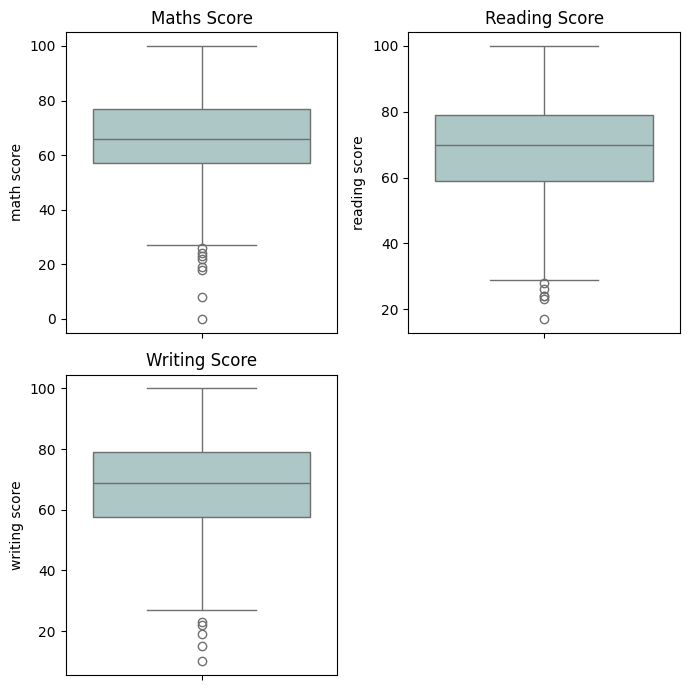

In [48]:
plt.figure(figsize=(7,7))

plt.subplot(2,2,1)
sns.boxplot(df['math score'],color='#A9CACA')
plt.title('Maths Score')

plt.subplot(2,2,2)
sns.boxplot(df['reading score'],color='#A9CACA')
plt.title('Reading Score')

plt.subplot(2,2,3)
sns.boxplot(df['writing score'],color='#A9CACA')
plt.title('Writing Score')



plt.tight_layout()
plt.show()



*All the three numerical columns have lower outliers. Since the marks represent actual performance ,altering them doesn't seem sensible.
Will winsorize the lower outliers by replacing them with 5th percentile value.*

In [49]:
for col in numerical:
    lower_limit = df[col].quantile(0.05)  # Calculate 5th percentile
    df[col] = df[col].apply(lambda x: lower_limit if x < lower_limit else x)

* Encoding categorical variables using one-hot encoding .


---



In [50]:
df_encoded = pd.get_dummies(df, columns=['gender','race/ethnicity','parental level of education','lunch','test preparation course'], drop_first=True)

# Used One-Hot Encoding since all  categorical features had no ordinal relationship

* Normalize or standardize features
------------------------------------



1. Standardising is required to be done prior creating polynomial features otherwise the polynomial features will have very different ranges that can in turn affect model training.

2. In Multilinear Regression the correct order of events include performing features creation/selection first followed by standardisation.


In [51]:
features = df_encoded.drop('math score', axis=1)
target = df_encoded['math score']

# Applying StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Converting NumPy Array back to DataFrame
scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Join target column back
df_final = pd.concat([scaled_df, target.reset_index(drop=True)], axis=1)

df_final.head()

,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score
0,0.180168,0.387872,-0.964625,2.064742,-0.684419,-0.59583,-0.403473,2.733967,-0.493742,-0.250398,-0.540361,-0.466933,0.741881,0.746748,72.0
1,1.481016,1.364617,-0.964625,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,0.741881,-1.339140,69.0
2,1.842363,1.713455,-0.964625,2.064742,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,3.993639,-0.540361,-0.466933,0.741881,0.746748,90.0
3,-0.903873,-1.705153,1.036672,-0.484322,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,-0.540361,-0.466933,-1.347925,0.746748,47.0
4,0.613784,0.457640,1.036672,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,0.741881,0.746748,76.0


**2. Feature Engineering**
----------------------------------

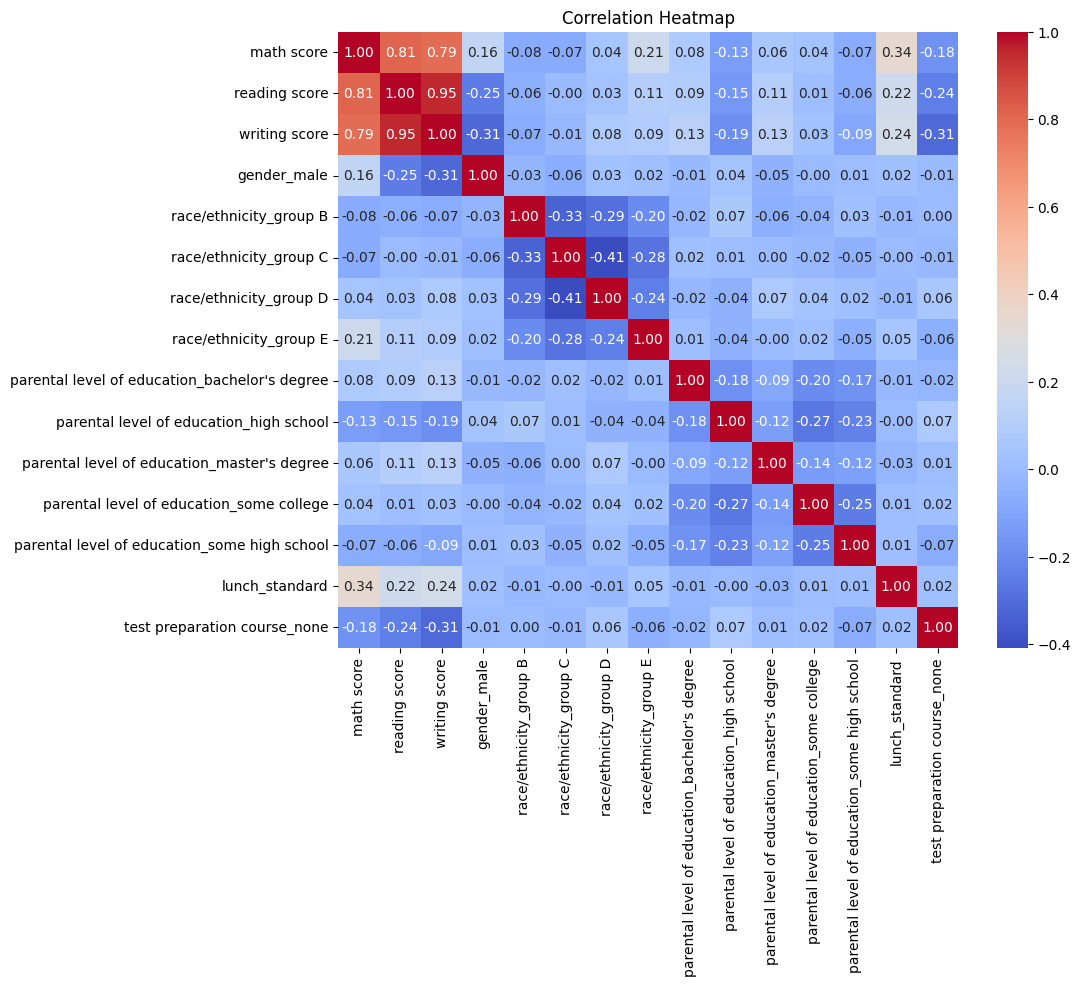

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

* Choosing\ relevant features to predict math score for **Multilinear Regression**.

In [53]:
selected_features = ['reading score', 'writing score','gender_male','lunch_standard','test preparation course_none']
X = df_encoded[selected_features]
y = df_encoded['math score']

* Creating  polynomial features for **Polynomial Regression** .

In [54]:
# Separating features and target

Xp = df_final.drop('math score', axis=1)
yp = df_final['math score']

# importing Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
Xp_poly = poly.fit_transform(Xp)



**3. Model Building**
------------------------



* **Multilinear Regression**


---



1. Splitting data into training and test sets.

In [55]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)


2. Scaling features using standard scaler

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Training Linear regression model on scaled features

In [57]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

4. Predicting on test data

In [58]:
y_pred = model.predict(X_test_scaled)

5. Model Evaluation

In [59]:
r2 = r2_score(y_test, y_pred)
n= X_test.shape[0]            # Number of observations/samples
p = X_test.shape[1]            # Number of predictors/features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f" R² Score: {r2:.4f}")
print(f" Adjusted  R² Score:{adjusted_r2:.4f}")
print(f" Mean Squared Error (MSE): {mse:.4f}")
print(f" Mean Absolute Error (MAE): {mae:.4f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")


 R² Score: 0.8379
 Adjusted  R² Score:0.8368
 Mean Squared Error (MSE): 33.0000
 Mean Absolute Error (MAE): 4.6403
 Root Mean Squared Error (RMSE): 5.7446


6. Plotting (visualizing prediction using one feature)


In [60]:
X_test.columns

Index(['reading score', 'writing score', 'gender_male', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')

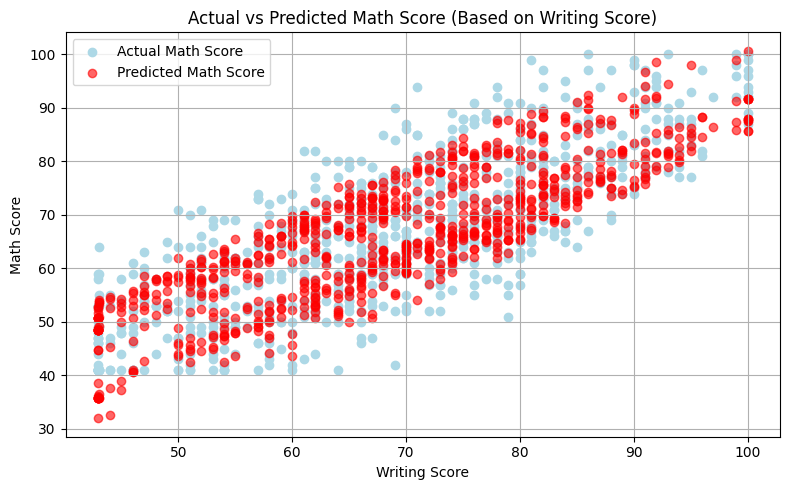

In [61]:
feature_index = 1  #  'writing score' is at index 1
X_plot = X_test.iloc[:, feature_index]

plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_test, color='lightblue', label='Actual Math Score')
plt.scatter(X_plot, y_pred, color='red', alpha=0.6, label='Predicted Math Score')
plt.xlabel('Writing Score')
plt.ylabel('Math Score')
plt.title('Actual vs Predicted Math Score (Based on Writing Score)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Polynomial Regression (degree 2)**


---



1. Splitting data into training and test sets.

In [62]:
Xp_test, Xp_train, yp_test, yp_train = train_test_split(Xp, yp, test_size=0.2, random_state=42)

2. Scaling features using standard scaler

In [63]:
scaler = StandardScaler()
Xp_train_scaled = scaler.fit_transform(Xp_train)
Xp_test_scaled = scaler.transform(Xp_test)

3. Training  Polynomial regression model on scaled features

In [64]:
poly_model = LinearRegression()
poly_model.fit(Xp_train_scaled, yp_train)

LinearRegression()

4. Predicting on test data

In [65]:
yp_pred= poly_model.predict(Xp_test_scaled)

5. Model Evaluation

In [66]:
r2 = r2_score(yp_test, yp_pred)
n= X_test.shape[0]            # Number of observations/samples
p = X_test.shape[1]            # Number of predictors/features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(yp_test, yp_pred)
mae = mean_absolute_error(yp_test, yp_pred)
rmse = np.sqrt(mse)

print(f" R² Score: {r2:.4f}")
print(f" Adjusted  R² Score:{adjusted_r2:.4f}")
print(f" Mean Squared Error (MSE): {mse:.4f}")
print(f" Mean Absolute Error (MAE): {mae:.4f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")

 R² Score: 0.8435
 Adjusted  R² Score:0.8425
 Mean Squared Error (MSE): 31.8609
 Mean Absolute Error (MAE): 4.5407
 Root Mean Squared Error (RMSE): 5.6445


6. Visualize Predicted vs Actual Values

In [67]:
Xp_test.columns

Index(['reading score', 'writing score', 'gender_male',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')

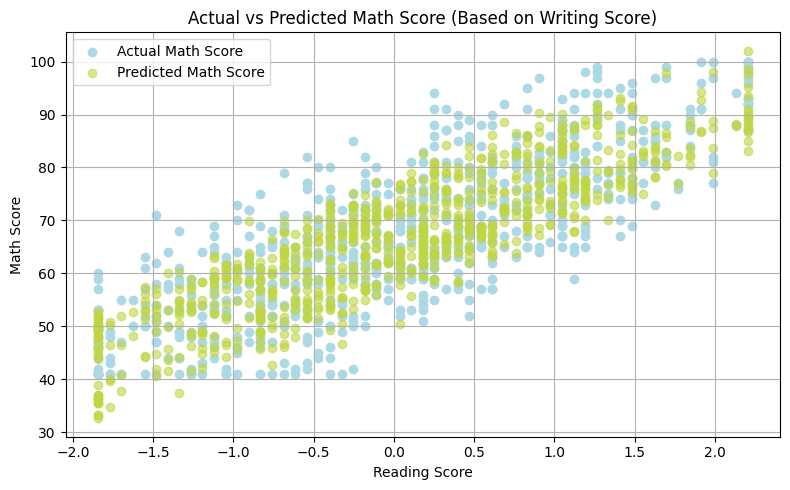

In [68]:
feature_index = 0  #  'Reading score' is at index 0
Xp_plot = Xp_test.iloc[:, feature_index]

plt.figure(figsize=(8, 5))
plt.scatter(Xp_plot, yp_test, color='lightblue', label='Actual Math Score')
plt.scatter(Xp_plot, yp_pred, color='#BFD641', alpha=0.6, label='Predicted Math Score')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.title('Actual vs Predicted Math Score (Based on Writing Score)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

7. Discussing overfitting or underfitting in Polynomial Regression.

In [69]:
# Predict on training set
yp_train_pred = poly_model.predict(Xp_train)

train_r2 = r2_score(yp_train, yp_train_pred)
test_r2 = r2_score(yp_test, yp_pred)

print(f"Training R²: {train_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")
#Compare R2 scores.

Training R²: 0.86
Test R²: 0.84


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


***Overview of Overfitting & Underfitting***

***1.
Overfitting*** *occurs when a model learns too much detail from the training data, making it perform extremely well on training data but poorly on unseen data. It simply memorizes the training data instead of understanding the patterns*

***2.Underfitting*** *occurs when a model fails to capture the relationship between the input and output data.*
*It performs poorly on both training and test data, meaning its failure to learn the  patterns.*



***Observation***:

***1. Not overfitting:*** *Model performs almost equally well on both training and test data.*

***2. Not underfitting:*** *R² scores above 0.85 on both sets mean your model understands the  pattern well.*

***Conclusion:*** *The model isn't just memorizing the training data ,it is also making accurate predictions on unseen data.*
